In [5]:
import math
from graphviz import Digraph

## Scalar Class : A Custom Variable with Autograd Built in

In [131]:
class Scalar:

    def __init__(self, value, _parents=(), label='',operation=''):
        self.value     = value
        self.gradient  = 0.0
        self.operation = ''
        self.parents = set(_parents)
        self._backward = lambda *args: print("Backward Leaf : ",self.label)
        self.label = label

    def __repr__(self):
        return f"{self.label} | {self.value}"
    
    def __add__(self, other):

        out = None
        
        if(isinstance(other, Scalar)):
            sum = self.value + other.value
            out =  Scalar(sum, (self, other),'+') #storing reference to self and other
            
            def _backward():

                self.gradient  += 1.0*out.gradient
                other.gradient += 1.0*out.gradient

                self._backward()
                other._backward()
            
            out._backward = _backward

            return out

        
        elif (isinstance(other, int) or isinstance(other, float)):
            sum = self.value + other
            out =  Scalar(sum, (self, Scalar(other)), '+')

            def _backward():

                self.gradient  += 1.0*out.gradient

                self._backward()
            
            out._backward = _backward
            
            return out
        else:
            raise TypeError("Invalid Operand for Addition of the Scalar datatype")



    def __radd__(self, other):
        return self+other
    
    
    def __mul__(self, other):
        if(isinstance(other, Scalar)):
            product = self.value * other.value

            out =  Scalar(product, (self, other), '*') #storing reference to self and other

            def _backward():

                self.gradient  += other.value*out.gradient
                other.gradient += self.value*out.gradient

                self._backward()
                other._backward()
            
            out._backward = _backward
            return out
            
        elif (isinstance(other, int) or isinstance(other, float)):
            product = self.value * other
            out =  Scalar(product, (self, Scalar(other)), '*')

            def _backward():

                self.gradient  += other*out.gradient
                self._backward()
            
            out._backward = _backward

            
            return out


        
        else:
            raise TypeError("Invalid Operand for Multiplication of the Scalar datatype")




    def __rmul__(self, other):
        return self*other

    
    
    def get_parents(self):
        print(self.parents)

    

    def clear_gradient(self):
        self.gradient = 0.0
                
    

## Generate the graph 

In [134]:
nodes = set()
edges = set()
def generate_graph(node):
    nodes.add(node)
    for parent in node.parents:
        edges.add((parent, node))
        
        generate_graph(parent)



## Visualize the Graph

In [137]:
def visualize_graph(nodes, edges):

    graph = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    for node in nodes:
        graph.node(node.label, label="{ %s | %s | %s | %s}" %(node.label, node.operation, node.value, node.gradient), shape='record')


    for edge in edges:
        graph.edge(edge[0].label, edge[1].label)


    
    return graph

## Create Your Expressions

In [141]:
a = Scalar(0.200, label='a')
b = Scalar(1.000, label='b')

c = a + b
c.label = 'c'
c.operation = '+'

d = Scalar(0.500, label='d')

e = c * d
e.label = 'e'
e.operation = '*'

f = e * a
f.label = 'f'
f.operation = '*'

g = f*2.0
g.label= 'g'
g.operation = '*'


## Calling Backward to compute the sensitivities

In [149]:
g.gradient = 1.0
g._backward()

Backward Leaf :  a
Backward Leaf :  b
Backward Leaf :  d
Backward Leaf :  a


## Visualize the Computational Graph

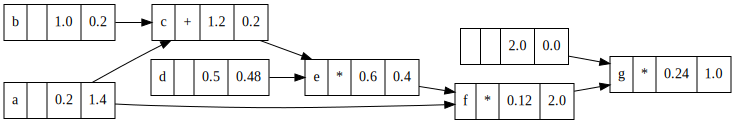

In [145]:
nodes = set()
edges = set()
generate_graph(g)
graph = visualize_graph(nodes, edges)
graph